<a href="https://colab.research.google.com/github/kushum-coder/2501460_kushum/blob/main/Worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# =========================
# Cell 1: Import Libraries
# =========================
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# =========================
# Cell 2: Load IMDB Dataset
# =========================
imdb_path = '/content/drive/MyDrive/IMDB Dataset.csv'
imdb_df = pd.read_csv(imdb_path)

# Check first 5 rows
imdb_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# =========================
# Cell 3: Preprocess IMDB Reviews
# =========================
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation
    tokens = [word for word in text.split() if word not in stop_words]  # remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # stemming
    return ' '.join(tokens)

imdb_df['review_clean'] = imdb_df['review'].apply(preprocess_text)

# Check preprocessed reviews
imdb_df[['review', 'review_clean']].head()

,review,review_clean
0,One of the other reviewers has mentioned that ...,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...


In [5]:
# =========================
# Cell 4: Split IMDB Dataset
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    imdb_df['review_clean'], imdb_df['sentiment'], test_size=0.2, random_state=42
)

In [6]:
# =========================
# Cell 5: Bag-of-Words Vectorization
# =========================
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [7]:
# =========================
# Cell 6: Train Naive Bayes
# =========================
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

Accuracy: 0.8555
Precision: 0.8691454396055875
Recall: 0.8396507243500695
F1-Score: 0.8541435348743313
Confusion Matrix:
 [[4324  637]
 [ 808 4231]]
ROC-AUC Score: 0.9224501018641973


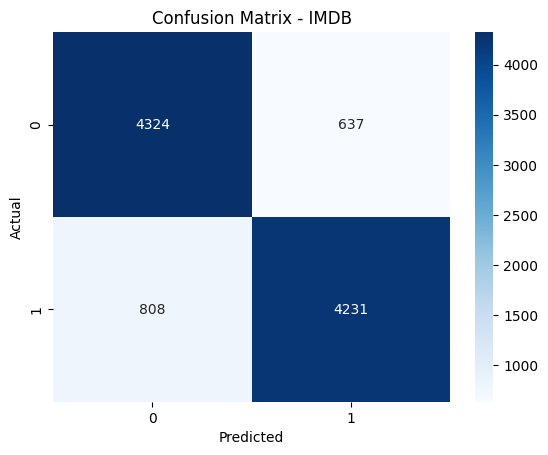

In [8]:
# =========================
# Cell 7: IMDB Predictions & Evaluation
# =========================
y_pred = nb_model.predict(X_test_vec)
y_prob = nb_model.predict_proba(X_test_vec)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='positive'))
print("Recall:", recall_score(y_test, y_pred, pos_label='positive'))
print("F1-Score:", f1_score(y_test, y_pred, pos_label='positive'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score((y_test=='positive').astype(int), y_prob))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - IMDB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# =========================
# Cell 8: Load Breast Cancer Dataset
# =========================
bc_path = '/content/drive/MyDrive/breast-cancer_with_header.csv'
bc_df = pd.read_csv(bc_path)

# Check first 5 rows
bc_df.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [12]:
# =========================
# Cell 9 : Split Features and Target + Encode Categorical Features
# =========================
# Assuming 'Class' is the target
X = bc_df.drop('Class', axis=1)
y = bc_df['Class']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Features after encoding:", X_train.shape[1])

Features after encoding: 41


In [13]:
# =========================
# Cell 10 : RFE Feature Selection (Top 5 Features)
# =========================
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Top 5 Features Selected by RFE:", selected_features)

Top 5 Features Selected by RFE: Index(['deg_malig', 'menopause_ge40', 'tumor_size_10-14', 'inv_nodes_0-2',
       'breast_quad_?'],
      dtype='object')


===== Breast Cancer Model Evaluation (Top 5 Features) =====
Accuracy: 0.6896551724137931
Precision: 1.0
Recall: 0.14285714285714285
F1-Score: 0.25
ROC-AUC Score: 0.7303732303732303


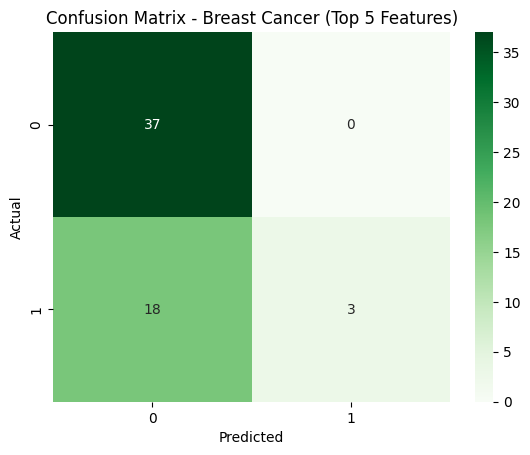

In [15]:
# =========================
# Cell 11: Train Logistic Regression with Selected Features
# =========================
logreg.fit(X_train[selected_features], y_train)
y_pred = logreg.predict(X_test[selected_features])
y_prob = logreg.predict_proba(X_test[selected_features])[:,1]

# Evaluation
print("===== Breast Cancer Model Evaluation (Top 5 Features) =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='recurrence-events'))
print("Recall:", recall_score(y_test, y_pred, pos_label='recurrence-events'))
print("F1-Score:", f1_score(y_test, y_pred, pos_label='recurrence-events'))
print("ROC-AUC Score:", roc_auc_score((y_test=='recurrence-events').astype(int), y_prob))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Breast Cancer (Top 5 Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# =========================
# Cell 12: Experiment with Top 3 and Top 7 Features
# =========================
for n_features in [3, 7]:
    # Apply RFE to select n_features
    rfe_exp = RFE(logreg, n_features_to_select=n_features)
    rfe_exp.fit(X_train, y_train)

    # Get selected features
    feat = X.columns[rfe_exp.support_]

    # Train Logistic Regression with selected features
    logreg.fit(X_train[feat], y_train)
    y_pred_exp = logreg.predict(X_test[feat])
    y_prob_exp = logreg.predict_proba(X_test[feat])[:,1]

    # Evaluation
    print(f"\n===== Breast Cancer Model Evaluation (Top {n_features} Features) =====")
    print("Selected Features:", list(feat))
    print("Accuracy:", accuracy_score(y_test, y_pred_exp))
    print("Precision:", precision_score(y_test, y_pred_exp, pos_label='recurrence-events'))
    print("Recall:", recall_score(y_test, y_pred_exp, pos_label='recurrence-events'))
    print("F1-Score:", f1_score(y_test, y_pred_exp, pos_label='recurrence-events'))
    print("ROC-AUC Score:", roc_auc_score((y_test=='recurrence-events').astype(int), y_prob_exp))


===== Breast Cancer Model Evaluation (Top 3 Features) =====
Selected Features: ['deg_malig', 'tumor_size_10-14', 'inv_nodes_0-2']
Accuracy: 0.6896551724137931
Precision: 1.0
Recall: 0.14285714285714285
F1-Score: 0.25
ROC-AUC Score: 0.7355212355212355

===== Breast Cancer Model Evaluation (Top 7 Features) =====
Selected Features: ['deg_malig', 'age_60-69', 'menopause_ge40', 'tumor_size_10-14', 'inv_nodes_0-2', 'node_caps_no', 'breast_quad_?']
Accuracy: 0.6896551724137931
Precision: 0.7142857142857143
Recall: 0.23809523809523808
F1-Score: 0.35714285714285715
ROC-AUC Score: 0.7361647361647361
